**PREDICTING IMPACT OF MUTATIONS**

Personalized medicine is an emerging practice of medicine that uses an individual's genetic profile to inform decisions related to prevention, diagnosis and treatment of a disease. High-throughput biomedical assays, such as DNA sequencing, has revealed a great deal of inter-individual variation shedding light on the diverse effects, mechanisms and contributing factors involved in the disease process.

ClinVar stands as an accessible public repository containing information on human genetic variants and their interpretations. Over 1300 organizations contribute submitting variant interpretation to ClinVar making it a valuable resource in the field.

In this context, the objective of this work is to predict the impact of a mutation, classifying them as pathogenic, uncertain significance or benign. We will explore different fields that characterize mutations, aiming to obtain valuable insights from the data.

To start our exploration, we will obtain data from [ClinVar ftp site]((https://ftp.ncbi.nlm.nih.gov/pub/clinvar/vcf_GRCh38/) and examine how is it composed:



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import gzip

def clinvar_vcf_to_pd(vcf_path: str) -> list:
    """
    From a vcf file it creates a list containing information of each mutation
    described in clinvar as a dictionary.
    Args:
        vcf_path (str): path to the vcf file where we will extract the information
    Returns:
        variants_params (list): list of dictionaries where each item of a list is a dictionary
            that describes the variant
    """

    # list where we will store dictionary params of each variant
    variants_params = list()
    with gzip.open(vcf_path, "rt") as file:
        for line in file:
            # remove \n
            line = line.strip()
            # dictinary where we will store each parameter of the variant
            if line.startswith("#"):
                # descriptor lines not interested in
                continue
            fields = line.split("\t")
            # dictinary where we will store each parameter of the variant
            # obtaining parameters from each variant
            chrom = fields[0]
            pos = fields[1]
            id = fields[2]
            ref = fields[3]
            alt = fields[4]
            qual = fields[5]
            filter = fields[6]
            info = fields[7]
            dict_params = {
                "Chrom" : chrom,
                "Pos" : pos,
                "Id" : id,
                "Ref" : ref,
                "Alt" : alt,
                "Qual" : qual,
                "Filter" : filter,

            }
            # print(fields)

            # in info we have different parameters
            clnv_params = info.split(";")

            for clnv_param in clnv_params:
                key_value = clnv_param.split("=")
                key = key_value[0]
                value = key_value[1]

                # add each annotation as a key_dict value in dict_params
                dict_params[key] = value

            # create a list of  mutations with dicts that store its information
            variants_params.append(dict_params)

    return(variants_params)

variants_params = clinvar_vcf_to_pd("/content/drive/MyDrive/adquisicio_preparacio_dades_files/clinvar_20231104.vcf.gz")
df = pd.DataFrame(variants_params)
# print(variants_params)

First, let's take an initial look at the dataframe:

In [5]:
df

,Chrom,Pos,Id,Ref,Alt,Qual,Filter,ALLELEID,CLNDISDB,CLNDN,...,RS,AF_EXAC,AF_ESP,CLNSIGCONF,AF_TGP,CLNVI,CLNDISDBINCL,CLNDNINCL,CLNSIGINCL,DBVARID
0,1,69134,2205837,A,G,.,.,2193183,"MeSH:D030342,MedGen:C0950123",Inborn_genetic_diseases,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,69581,2252161,C,G,.,.,2238986,"MeSH:D030342,MedGen:C0950123",Inborn_genetic_diseases,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,69682,2396347,G,A,.,.,2386655,"MeSH:D030342,MedGen:C0950123",Inborn_genetic_diseases,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,69769,2288999,T,C,.,.,2278803,"MeSH:D030342,MedGen:C0950123",Inborn_genetic_diseases,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,69995,2351346,G,C,.,.,2333177,"MeSH:D030342,MedGen:C0950123",Inborn_genetic_diseases,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2300570,NW_003315925.1,83614,17735,TC,T,.,.,32774,"Human_Phenotype_Ontology:HP:0032224,MedGen:C00...",ABO_blood_group_system|not_provided,...,1556058284,NaN,NaN,NaN,NaN,OMIM:110300.0001,NaN,NaN,NaN,NaN
2300571,NW_003315947.1,181683,156304,C,G,.,.,166084,MedGen:C3272265|MedGen:CN517202|.,Three_Vessel_Coronary_Disease|not_provided|PLA...,...,281865545,NaN,NaN,NaN,NaN,ClinGen:CA123258|OMIM:173445.0001,NaN,NaN,NaN,NaN
2300572,NW_003315950.2,355765,206,G,A,.,.,15245,"MONDO:MONDO:0013193,MedGen:C2750473,OMIM:61323...","Thyrotoxic_periodic_paralysis,_susceptibility_...",...,672601244,NaN,NaN,NaN,NaN,ClinGen:CA114051|OMIM:613236.0003|UniProtKB:B7...,NaN,NaN,NaN,NaN
2300573,NW_003315950.2,356212,205,C,T,.,.,15244,"MONDO:MONDO:0013193,MedGen:C2750473,OMIM:61323...","Thyrotoxic_periodic_paralysis,_susceptibility_...",...,527236158,NaN,NaN,NaN,NaN,ClinGen:CA114049|OMIM:613236.0002|UniProtKB:B7...,NaN,NaN,NaN,NaN


We can see that ClinVar has reported 2300575 variants. The variable that we are interested in is CLNSIG which gives the pathogenicity of mutations.

We can take a look at the values that contain this variable:


In [6]:
# Increase the maximum number of rows displayed
pd.set_option("display.max_rows", None)
print(df["CLNSIG"].value_counts())
print(len(df["CLNSIG"].value_counts()))



Uncertain_significance                                                  1119917
Likely_benign                                                            606648
Benign                                                                   193397
Pathogenic                                                               135240
Conflicting_interpretations_of_pathogenicity                             103898
Likely_pathogenic                                                         67707
Benign/Likely_benign                                                      37604
Pathogenic/Likely_pathogenic                                              19862
not_provided                                                              10397
drug_response                                                              1884
other                                                                      1607
risk_factor                                                                 447
association                             

As we can see, the interpretation of a mutation is not always strightforward and evident to classify. However, the American College of Medical Genetics and Genomics (ACMG), which is a highly reputated institution, has provided guidelines with [recommendations](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4544753/) for describing variants. These guidelines employ standard terminology categorizing variants into pathogenic, likely_pathogenic, uncertain significance, likely benign and benign.

We can observe that some variants are classified as 2 different categories (e.g. Benign/Likely_benign or Pathogenic/Likely_pathogenic). Due to the the ambiguity in predicting the pathogenicity of variants, we will simplify our model by utilizing three simplified categories:
- Benign: include variants classified as Benign and Likely benign.
- Pathogenic: include variants classified as Pathogenic and Likely pathogenic.
- Uncertain significance: include variants classified asUncertain significance.

The ACMG pathogenicity values are captured in the CLNSIG column, where additional information is present in the same column seperated by a |, with ACMG classification being the first value. To prevent missclassifications, variants lacking an ACMG classification will be ignored. The exclusion of these variants could be crutial, given the absence of a clear pattern for accurately categorizing those variats.

In [7]:
df["ACMG_class"] = df["CLNSIG"].str.split("|").str[0]


In [124]:
print(df["ACMG_class"].value_counts())
print(len(df["ACMG_class"].value_counts()), len(df["CLNSIG"].value_counts()))

Uncertain_significance                                     1119947
Likely_benign                                               606667
Benign                                                      193425
Pathogenic                                                  135415
Conflicting_interpretations_of_pathogenicity                103957
Likely_pathogenic                                            67744
Benign/Likely_benign                                         37619
Pathogenic/Likely_pathogenic                                 19879
not_provided                                                 10397
drug_response                                                 1888
other                                                         1608
risk_factor                                                    447
association                                                    355
Affects                                                        151
Uncertain_significance/Uncertain_risk_allele                  

We have reduced the number of categories from 88 to 26 by only focusing on the first value seperated by |. This step help to easily classify the variants as Benign, pathogenic or Uncertain significance. We will only take into account the categories that are described in ACMG to create a new dataframe containing those variants and code a new category named model_class that will be encoded as follows:
- 0 : Benign and Likely Benign variants.
- 1 : Uncertain significance variants.
- 2 : Pathogenic and Likely pathogenic variants.



In [8]:
# ACMG_class categories codified as benign
benign_categories = ["Benign", "Likely_benign", "Benign/Likely_benign"]
# ACMG_class categories codified as pathogenic
patho_categories = ["Pathogenic", "Likely_pathogenic", "Pathogenic/Likely_pathogenic", "Likely_pathogenic/Likely_risk_allele", "Pathogenic/Likely_risk_allele", "Pathogenic/Likely_pathogenic/Pathogenic,_low_penetrance", "Likely_pathogenic,_low_penetrance", "Pathogenic/Likely_pathogenic/Likely_risk_allele", "Likely_pathogenic/Pathogenic,_low_penetrance"]
# ACMG_class categories codified as uncertain_significance
uncertain_categories = ["Uncertain_significance"]
df_bening = df[df["ACMG_class"].isin(benign_categories)].copy()
df_bening["model_class"] = 0
df_patho = df[df["ACMG_class"].isin(patho_categories)].copy()
df_patho["model_class"] = 2
df_uncertain = df[df["ACMG_class"].isin(uncertain_categories)].copy()
df_uncertain["model_class"] = 1

all_df = pd.concat([df_bening, df_patho, df_uncertain])


In [9]:
all_df["model_class"].value_counts()

1    1119947
0     837711
2     223078
Name: model_class, dtype: int64

From the initial data with 2300575 variants, we still have 2180736 classified variants.
The amount of data is still very large. In order to reduce the amount of data, we will only take the data that we are more sure to be correctly assigned. In the dataframe we have a column called CLNREVSTAT that contains the status of the review for each variant. [ClinVar gives a value to each review status depending on the factor that contains the CLNREVSTAT variable.](https://www.ncbi.nlm.nih.gov/clinvar/docs/review_status/)

In [127]:
df["CLNREVSTAT"].value_counts()

criteria_provided,_single_submitter                     1786851
criteria_provided,_multiple_submitters,_no_conflicts     332969
criteria_provided,_conflicting_interpretations           103708
no_assertion_criteria_provided                            50850
reviewed_by_expert_panel                                  15031
no_assertion_provided                                     10396
no_interpretation_for_the_single_variant                    719
practice_guideline                                           51
Name: CLNREVSTAT, dtype: int64

We will create a new column called CLNREVSTAT_value that will take into account the CLNREVSTAT factor for each variant as described in this [ClinVar link](https://www.ncbi.nlm.nih.gov/clinvar/docs/review_status/) where ClinVar explains how to classify the CLNREVSTAT category in order to know which are the variants that are provided with more confident with values ranging from 0-4 (where 4 is the maximum amount of confidence that the variant is correctly classified). We will only consider variants that have a criteria review puntuation of 3 and 4 in order to be sure that the variants used to train the model are surely well classified and to facilitate the time that it takes to extract more annotations from each variant in a posterior step.

In [128]:

criteria_review = {
    "practice_guideline" : 4,
    "reviewed_by_expert_panel" : 3,
    "criteria_provided,_multiple_submitters,_no_conflicts" : 2,
    "criteria_provided,_conflicting_interpretations" : 1,
    "criteria_provided,_single_submitter": 1,
    "no_assertion_criteria_provided": 0,
    "no_interpretation_for_the_single_variant": 0,
    "no_assertion_provided": 0
}

all_df["CLNREVSTAT_value"] = df["CLNREVSTAT"].replace(criteria_review)

review_df = all_df[all_df["CLNREVSTAT_value"].isin([4, 3])]
review_df.shape

(14976, 31)

From the initial amount of variants, we kept only 14921. This will help to proceed with the project due to the amount of time necessary to annotate the variants using Variant Effect Predictor software in posterior steps. Let's see which columns does the dataframe also contains:

In [129]:
review_df.columns

Index(['Chrom', 'Pos', 'Id', 'Ref', 'Alt', 'Qual', 'Filter', 'ALLELEID',
       'CLNDISDB', 'CLNDN', 'CLNHGVS', 'CLNREVSTAT', 'CLNSIG', 'CLNVC',
       'CLNVCSO', 'GENEINFO', 'MC', 'ORIGIN', 'RS', 'AF_EXAC', 'AF_ESP',
       'CLNSIGCONF', 'AF_TGP', 'CLNVI', 'CLNDISDBINCL', 'CLNDNINCL',
       'CLNSIGINCL', 'DBVARID', 'ACMG_class', 'model_class',
       'CLNREVSTAT_value'],
      dtype='object')

Most of the columns that we have on our dataframe are variables that are provided by the reviewer, so we won't have this information on new variants which we want to predict its pathogenicity. For this reason, we will drop these columns and only keep those ones that are used to identify the variant and the column that we want to predict.

We will also create again a vcf file because is the input needed for the [Variant Effect Predictor (VEP)](https://www.ensembl.org/info/docs/tools/vep/index.html) software to obtain information about the variants.


In [130]:
# columns to keep in dataframe
columns_to_keep = ['Chrom', 'Pos', 'Id', 'Ref', 'Alt', 'ACMG_class', 'model_class', 'CLNREVSTAT', 'CLNSIG']
review_df = review_df[columns_to_keep]

# let's convert into a vcf file again to annotate the variants

def df_to_vcf(df: pd.DataFrame, header: str) -> str:
    """
    From a dataframe, it extracts the fields Chrom, Pos, Id, Ref, Alt, CLNSIG ref_num and alt_num
    to create a VCF file
    args:
        df(pd.DataFrame): pandas dataframe containing previously defined columns
        header(str): header of the vcf file that the output will contain
    Return:
        output_filename(str): vcf file path
    """
    output_filename = "/content/drive/MyDrive/adquisicio_preparacio_dades_files/15112023_filtered_vcf_file.vcf"

    with open(output_filename, "w") as output_vcf:
        output_vcf.write(header)
        # defining constant values in vcf as are necessary fields in vcf format.
        qual = "."
        filter = "."
        for index, row in df.iterrows():
            chrom = str(row["Chrom"])
            pos = str(row["Pos"])
            rs_id = str(row["Id"])
            ref = str(row["Ref"])
            alt = str(row["Alt"])
            clnsig = str(row["CLNSIG"])

            acmg_class = str(row["ACMG_class"])
            model_class = str(row["model_class"])
            clnrevstat = str(row["CLNREVSTAT"])


            inf_field = f"CLNSIG={clnsig};acmg_class={acmg_class};model_class={model_class};clnrevstat={clnrevstat}"

            vcf_line = [chrom, pos, rs_id, ref, alt, qual, filter, inf_field]

            vcf_line = "\t".join(vcf_line)
            output_vcf.write(vcf_line + "\n")

    return(output_filename)

df_to_vcf(review_df, "#CHROM\tPOS\tID\tREF\tALT\tQUAL\tFILTER\tINFO\n")

'/content/drive/MyDrive/adquisicio_preparacio_dades_files/15112023_filtered_vcf_file.vcf'

Using the output of the previous code block, we will run vep to obtain an annotated vcf that can be obtained from the input files posted in the exercise.
Let's parse the output file in order to obtain the dataframe with the variants and all its annotations.

In [10]:
import pandas as pd
def clinvar_annotated_vcf_to_pd(vcf_path: str) -> list:
    """
    From a vcf file it creates a list containing information of each mutation
    described in clinvar as a dictionary.
    Args:
        vcf_path (str): path to the vcf file where we will extract the information
    Returns:
        variants_params (list): list of dictionaries where each item of a list is a dictionary
            that describes the variant
    """

    # list where we will store dictionary params of each variant
    variants_params = list()
    with open(vcf_path, "r") as file:
        for line in file:
            # remove \n
            line = line.strip()
            # dictinary where we will store each parameter of the variant
            if line.startswith("#"):
                # info line where are stored vep fields in order
                if line.startswith("##INFO=<ID=CSQ"):
                    word_to_find = "Format: "
                    index = line.rfind(word_to_find[-1])
                    # string containing the fields of each mutation in order
                    fields_str = line[index+1:-2]
                    # each field is seperated by |
                    fields_tuple = tuple(fields_str.split("|"))



                # descriptor lines not interested in
                continue
            fields = line.split("\t")
            # dictinary where we will store each parameter of the variant
            # obtaining parameters from each variant
            chrom = fields[0]
            pos = fields[1]
            id = fields[2]
            ref = fields[3]
            alt = fields[4]
            qual = fields[5]
            filter = fields[6]
            info = fields[7]
            dict_params = {
                "Chrom" : chrom,
                "Pos" : pos,
                "Id" : id,
                "Ref" : ref,
                "Alt" : alt,
                "Qual" : qual,
                "Filter" : filter,

            }
            # print(fields)

            # in info we have different parameters
            params = info.split(";")

            for param in params:


                key_value = param.split("=")
                key = key_value[0]

                value = key_value[1]

                # vep annotated fields
                if key == "CSQ":
                    # we just consider the first transcript if multiple are given
                    vep_trans = param.split(",")[0]
                    # vep annotations are seperated by |
                    vep_ann = vep_trans.split("|")
                    for ind, ann in enumerate(vep_ann):
                        # as the annotations are ordered, we mathc it with the tuple containing the name of each annotation
                        dict_params[fields_tuple[ind]]= ann
                    # we don't need to add whole annotation line in dict as we
                    # have already parsed it as key value pairs of annotations

                # add each annotation as a key_dict value in dict_params


                dict_params[key] = value

            # create a list of  mutations with dicts that store its information
            variants_params.append(dict_params)

    return(variants_params)

variants_params = clinvar_annotated_vcf_to_pd("/content/drive/MyDrive/adquisicio_preparacio_dades_files/15112023_output_noaf_3-4stars_simplified.vcf")

pd.set_option('display.max_rows', 10)

ann_df = pd.DataFrame(variants_params)

First of all let's see which columns we have in the dataframe:

In [11]:
# dropping columns that we won't use
ann_df = ann_df.drop(columns=["Amino_acids", "Id", "HGNC_ID", "Codons", "Existing_variation",  "HGVSc", "HGVSp", "DISTANCE", "STRAND", "SpliceAI_pred_DP_AG", "SpliceAI_pred_DP_AL", "SpliceAI_pred_DP_DG", "SpliceAI_pred_DP_DL"])

print(ann_df.columns)
print(len(ann_df.columns))

Index(['Chrom', 'Pos', 'Ref', 'Alt', 'Qual', 'Filter', 'CLNSIG', 'acmg_class',
       'model_class', 'clnrevstat', 'Allele', 'Consequence', 'IMPACT',
       'SYMBOL', 'Gene', 'Feature_type', 'Feature', 'BIOTYPE', 'EXON',
       'INTRON', 'cDNA_position', 'CDS_position', 'Protein_position', 'FLAGS',
       'VARIANT_CLASS', 'SYMBOL_SOURCE', 'GENE_PHENO', 'SIFT', 'PolyPhen',
       'SIFT_pred', 'SIFT_score', 'SpliceAI_pred_DS_AG', 'SpliceAI_pred_DS_AL',
       'SpliceAI_pred_DS_DG', 'SpliceAI_pred_DS_DL', 'SpliceAI_pred_SYMBOL',
       'CSQ'],
      dtype='object')
37


All the columns are encoded as objects, let's convert the the columns that don't rise errors to numeric in order to be able to run the model. Initially we have 37 different columns.

Accuracy: 69.41%


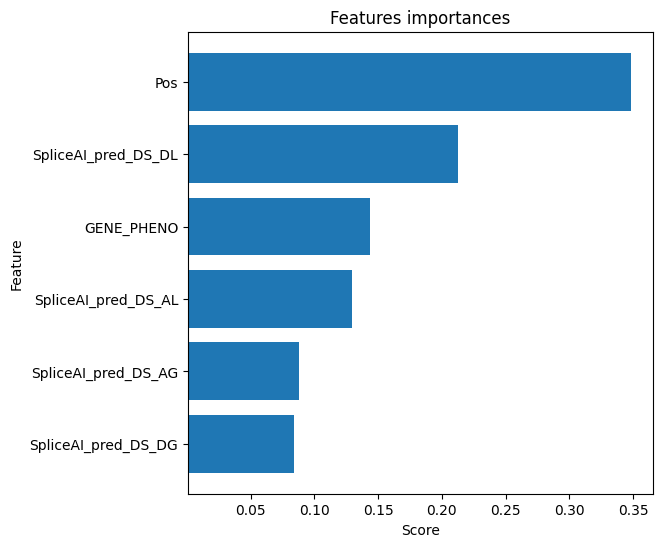

               feature     score
0                  Pos  0.347173
1  SpliceAI_pred_DS_DL  0.211316
2           GENE_PHENO  0.142958
3  SpliceAI_pred_DS_AL  0.128275
4  SpliceAI_pred_DS_AG  0.087253
5  SpliceAI_pred_DS_DG  0.083026


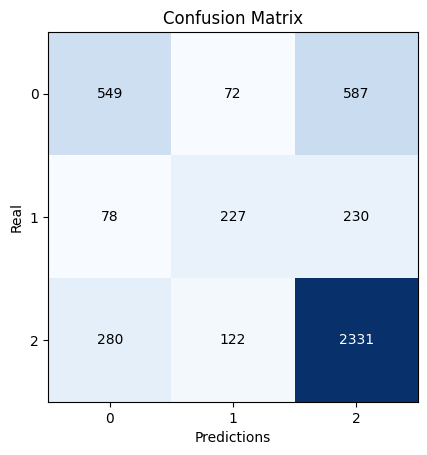

In [12]:

ann_df = ann_df.apply(pd.to_numeric, errors="ignore")
def classifier(data,target_column):
  from sklearn.model_selection import train_test_split
  from xgboost import XGBClassifier
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import confusion_matrix
  from datetime import datetime
  from matplotlib import pyplot as plt
  import numpy as np
  from mlxtend.plotting import plot_confusion_matrix

  # TRAIN TEST SPLIT 1(example without timeseries)
  data_numeric = data.select_dtypes(include=["number"])# Force only numeric columns
  X = data_numeric.drop(target_column, axis = 1)
  y = data_numeric[target_column]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3,random_state = 5,stratify=y)

  # TRAIN TEST SPLIT 2(example with timeseries)
  # train = data.loc[data['date']<datetime(2020,1,1)]
  # train_numeric = train.select_dtypes(include=["number"]) # Force only numeric columns
  # X_train = train_numeric.drop(target_column, axis = 1)
  # y_train = train_numeric[target_column]
  # test = data.loc[data['date']>=datetime(2020,1,1)]
  # test_numeric = test.select_dtypes(include=["number"]) # Force only numeric columns
  # X_test = test_numeric.drop(target_column, axis = 1)
  # y_test = test_numeric[target_column]

  # XGBOOST
  model = XGBClassifier()
  model.fit(X_train, y_train)

  # TEST EVALUATION
  y_pred = model.predict(X_test)
  print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred)*100))

  # SAVE TEST RESULTS
  result = pd.concat([X_test, pd.DataFrame({"predicted":y_pred,target_column:y_test})], axis = 'columns')
  result['error'] = result['predicted']-result[target_column]
  result['error_abs'] = abs(result['predicted']-result[target_column])
  result.to_csv("test_result.csv",index=None,decimal=",",sep=";")

  # PLOT FEATURE IMPORTANCES
  result = {}
  for i, feature in enumerate(X_train.columns):
      result[feature] = model.feature_importances_[i]
  f_importances = sorted(result.items(), key=lambda x: x[1], reverse=True)

  feat_names =[a_tuple[0] for a_tuple in f_importances]
  score = [a_tuple[1] for a_tuple in f_importances]

  fig, ax = plt.subplots(figsize=(6, 6))
  ax.barh(np.arange(len(f_importances)), score, left=0.001)
  ax.set_yticks(np.arange(len(f_importances)))
  ax.set_yticklabels(feat_names)
  ax.invert_yaxis()  # feat read top-to-bottom
  ax.set_xlabel('Score')
  ax.set_ylabel('Feature')
  ax.set_title('Features importances')
  plt.show()

  df_feat_importances = pd.DataFrame()
  df_feat_importances['feature'] = feat_names
  df_feat_importances['score'] = score
  print(df_feat_importances)

  # PLOT CONFUSION MATRIX
  fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred))
  plt.xlabel('Predictions')
  plt.ylabel('Real')
  plt.title('Confusion Matrix')
  plt.show()

classifier(ann_df , "model_class")

The model is able to predict correctly 69,41% of the variants.

In [13]:
ann_df["model_class"].value_counts()


2    9109
0    4028
1    1782
Name: model_class, dtype: int64

 However, we can see that the most represented pathogenicity is pathogenic variants (value of 2 with 9109), then benign variants (value of 0 with 4028 variants) and finally uncertain significance variants (value of 1 with 1782 variants) what makes that our model tends to categorize variants as pathogenic as seen in the correlation matrix where false positive values categorized as 2 are the more abundant.

 We have to take into account this fact during the analysis as it is an important fact in order to interpret the results correctly. The initial ration are:
 - 61,05% of initial variants are considered pathogenic (2)
 - 27% of the initial variants are considered benign (0)
 - 11,95% of the initial variants are considered of uncertain significance(1)

 Departures from this ratio could help us to identify properties that helps the model classify correctly the pathogenicity of the variant.

 First of all let's investigate which information is given by the variables in respect to our predicted variable to posteriorly see how to improve our model.

In [14]:
ann_df[["Filter", "Qual"]].value_counts()

Filter  Qual
.       .       14919
dtype: int64

First of all we can see that Qual and Filter are constant values that are mandatory in the vcf format to indicate the filter and quality of variants. Here, as we are not genotyping the mutations and we use the vcf file as a report format, as consequence, filter and quality are meaningless and we can remove these columns:


In [15]:
ann_df = ann_df.drop(columns=["Qual", "Filter"])

Previously we have coded the pathogenicity as 0 for benign and likely benign variants, 1 for Uncertain significate and 2 for pathogenic and likely pathogenic. Let's see its distribution.

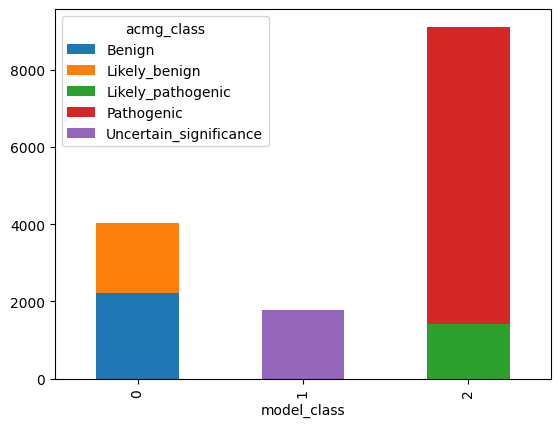

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


ann_df.groupby(['model_class', 'acmg_class']).size().unstack().plot(kind='bar', stacked=True)
plt.show()

We can see that benign variants are equally represented by benign and likely benign ACMG classification. However, pathogenic variants exhibit a notably higher prevalence, predominantly associated with classifications of variants as pathogenic by the ACMG guidelines, compared to Likely pathogenic variants which are less represented.

We can analyse the variations in reference and alternate nucleotides to identify patterns in their alterations, identifying whether certain changes are more probable than others.

In [17]:
# We can see that the most typical change in the reference genome is of 1 base (A, C, T or G)
print(ann_df["Ref"].value_counts())

G                       3360
C                       3345
T                       2221
A                       2158
CT                       213
                        ... 
AACAATTATGAATCTGATGT       1
CCAAAAATA                  1
TTAAATG                    1
TGAAAA                     1
CGCGGCG                    1
Name: Ref, Length: 991, dtype: int64


In [18]:
print(ann_df["Alt"].value_counts())

A          3845
T          3716
C          2843
G          2634
TA          188
           ... 
ACAT          1
CTTAT         1
CTTAG         1
TCCAA         1
CATGCCG       1
Name: Alt, Length: 390, dtype: int64


We can see that by difference, the most represented variants are the ones that changes only 1 nucleotide (A, C, T or G) which are called single nucletide variants (SNV). However, there are also exists insertions (alt is more than 1 nucleotide in length than ref) and deletions (when ref is more than 1 nucleotide in length than alt). Let's codify a new column called Ref_Alt_Dif that represents the difference in length of nucleotides to see how it's distributed.

count    14919.000000
mean        13.068235
std        246.860844
min       -454.000000
25%          0.000000
50%          0.000000
75%          1.000000
max       9557.000000
Name: Ref_Alt_Dif, dtype: float64


Text(0, 0.5, 'Length difference between ref an alt')

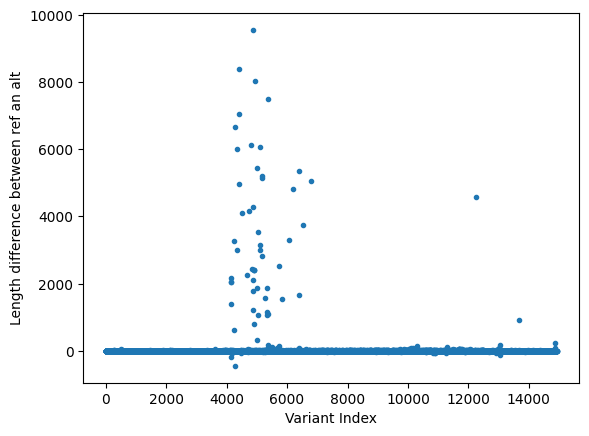

In [19]:

ann_df["Ref_Alt_Dif"] = ann_df["Ref"].apply(len) - ann_df["Alt"].apply(len)

print(ann_df["Ref_Alt_Dif"].describe())

result = plt.plot(ann_df["Ref_Alt_Dif"], ".")

plt.xlabel("Variant Index")
plt.ylabel("Length difference between ref an alt")

Ploting the difference between lengths of ref and alt, we can perfectly see that most of the variants are SNV (difference of 0). However, we can also see that is less usually found insertions (difference < 0) than deletions (difference > 0). Finally we can see that insertions tends to be of lower length (maximum of 454 bases) than deletions (maximum of 9557). In following steps we will take a look if the classification of the variant (SNV, insertion, deletion...) has any impact over pathogenicity of the variants.

We can eliminate acmg_class and clnrevstat categories as were the ones used to filter which variants to use as input. These values are obtained after the evalutation of each variant so we won't have these categories when we want to use our model to predict the pathogenicity of the variant. In addition, we can drop also the ID which is the clinvar ID variant, so it is only obtained when the variant is already entered in ClinVar.

In [20]:
ann_df = ann_df.drop(columns=["acmg_class", "clnrevstat"])

Let's see what represents the allele column:

In [21]:
# it is coded as CSQ=nucleotides. Nucleotides are alse represented in Alt and ref columns so let's compare these columns:
ann_df["Allele"]


0        CSQ=T
1        CSQ=G
2        CSQ=A
3        CSQ=C
4        CSQ=T
         ...  
14914    CSQ=C
14915    CSQ=C
14916    CSQ=G
14917    CSQ=G
14918    CSQ=G
Name: Allele, Length: 14919, dtype: object

We can see that it also gives information about the nucleotide but it includes a CSQ constant which provides from the VCF. CSQ is an indication that the annotations of vep have started there and Allele is the first annotation that vep produces. Let's remove the CSQ= string and compare it to Ref and Alt columns which also contains nucleotides:

In [22]:
# we remove the CSQ that is constant between all rows
ann_df["Allele"] = ann_df["Allele"].str.replace("CSQ=","")
ann_df[["Allele", "Alt", "Ref"]]


,Allele,Alt,Ref
0,T,T,G
1,G,G,T
2,A,A,G
3,C,C,T
4,T,T,C
...,...,...,...
14914,C,C,T
14915,C,C,T
14916,G,G,A
14917,G,G,A


It seems that Allele are giving the same information as Alt. Let's investigate it more deeply:

In [23]:
# it seems that Allele and Alt are the same, let's see if there are some rows that are different
diff_rows = ann_df[ann_df["Allele"] != ann_df["Alt"]]

diff_rows[["Allele","Alt", "Ref"]]

,Allele,Alt,Ref
125,-,A,ATCT
174,AGG,TAGG,T
177,A,TA,T
255,T,AT,A
257,CTAT,ACTAT,A
...,...,...,...
14862,-,T,TGGCATGGAGGATGAAACAATGTCTTTGCGCTCTCCCTCCCCTCGG...
14865,-,G,GTGGGGTCCTCGGAGCTCTCGGGCTCAGGTGGAGGTGGGGGCAGGG...
14866,-,G,GGTGGAGGTGGGGGCAGGGGTGGGAGCA
14868,-,G,GGCAGGGGTGGGA


We can see that seems that only insertions and deletions are not equal between Allele and Alt columns. Let's check it:

In [24]:
# if length of Alt == length Ref, it means that is a SNV
are_not_ins_del = (diff_rows["Alt"].str.len() == diff_rows["Ref"].str.len())

snv_rows = diff_rows[are_not_ins_del]
print(f"The total amount of SNV in rows that differ between Alt and Allele is {len(snv_rows)} what means that the only difference is between insertions and deletions and this variable give no further information about deletions and insertions so we can remove it.")


# CANVIAR-HO A FEATURE ENGINEERING
ann_df = ann_df.drop(columns=["Allele"])

The total amount of SNV in rows that differ between Alt and Allele is 0 what means that the only difference is between insertions and deletions and this variable give no further information about deletions and insertions so we can remove it.


The column Allele gives the same information for single nuleotide as Alt column. In addition, in insertions or deletions Allele column removes the nucleotide that is repeated in Ref or Alt, not providing more information about them. So, it seems that is a column that is not providing further information to the model.

Let's investigate the Gene column which represent the gene that is affecting the mutation.

In [25]:
ann_df["Gene"] = ann_df["Gene"].astype("category")
ann_df["Gene"].value_counts()

# ann_df.columns

ENSG00000139618    3923
ENSG00000012048    3339
ENSG00000171759     725
ENSG00000076242     646
ENSG00000095002     554
                   ... 
ENSG00000178795       2
ENSG00000166349       2
ENSG00000132832       1
ENSG00000149308       1
ENSG00000136636       1
Name: Gene, Length: 86, dtype: int64

We can see that genes are encoded with it's Ensembl identifier. We can see that there are 2 genes that are overly represented. These 2 genes are [BRCA1](http://www.ensembl.org/Homo_sapiens/Gene/Summary?g=ENSG00000012048;r=17:43044295-43170245) and [BRCA2](https://www.ensembl.org/Homo_sapiens/Gene/Summary?g=ENSG00000139618;r=13:32315086-32400268) which are tumor supressor genes. Let's see the pathogenicity of the mutations over these genes:

2    4842
0    2416
1       4
Name: model_class, dtype: int64


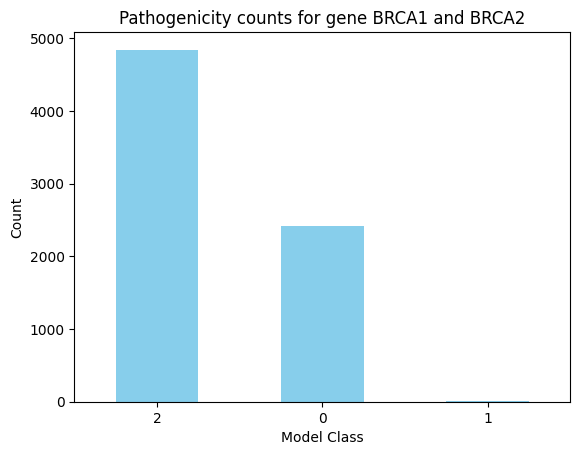

In [26]:
#There are 2 genes that are overly represented
gene_1_2 = ann_df["Gene"].isin(["ENSG00000139618", "ENSG00000012048"])
gene1_2_df = ann_df[gene_1_2]

value_counts = gene1_2_df["model_class"].value_counts()
print(value_counts)

value_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Model Class')
plt.ylabel('Count')
plt.title('Pathogenicity counts for gene BRCA1 and BRCA2')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Show the plot
plt.show()

We can see that there are very low occurrences of Uncertain_significance mutations over the genes ENSG00000139618 and ENSG00000012048. This is because variants in these genes predominantly influence the likelihood of developing cancer, either by enhancing or dimishing the probability. Consequently, variants in these genes exhibit a significant bias towards being classified as pathogenic or benign.

Considering this behavior, it may be usefull to indicate if the variant belong to these 2 genes in feature_engineering steps.

In [27]:
print(ann_df["Feature_type"].unique())
print(ann_df["Feature_type"].isna().sum())
print(ann_df["Feature_type"].value_counts())
# Feature type is always constant = Transcript so it gives no information to the model and we can remove that
ann_df = ann_df.drop(columns=["Feature_type"])

['Transcript']
0
Transcript    14919
Name: Feature_type, dtype: int64


We remove Feature type column as it is always constant and gives no information to the model.

In [28]:
ann_df["Feature"] = ann_df["Feature"].astype("category")
print(ann_df["Feature"].value_counts())
ann_df = ann_df.drop(columns=["Feature"])

ENST00000380152    3923
ENST00000309486    3339
ENST00000307000     725
ENST00000231790     646
ENST00000233146     554
                   ... 
ENST00000355808       2
ENST00000299440       2
ENST00000259154       1
ENST00000278612       1
ENST00000255183       1
Name: Feature, Length: 89, dtype: int64


We can see that transcripts yield an equivalent count to Genes column. This fact makes sense as transcripts originates from genes. As a result, we have two variables that contain redundant information to the model. It can be considered to remove one of them.

In [29]:
pd.set_option('display.max_rows', None)  # Display all rows

ann_df["Consequence"].value_counts()

frameshift_variant                                                                                                                                                           4472
missense_variant                                                                                                                                                             3314
synonymous_variant                                                                                                                                                           1598
stop_gained                                                                                                                                                                  1541
intron_variant                                                                                                                                                               1164
downstream_gene_variant                                                                                       

We can see that consequence column gives a summary of the consequences that the variant produce. Most of the categories are also provided by other columns in a simplified nomenclature to be parsed, for this reason we will not take into account now this column but we will take a look later to the column to consider if some information is not provided by other columns.

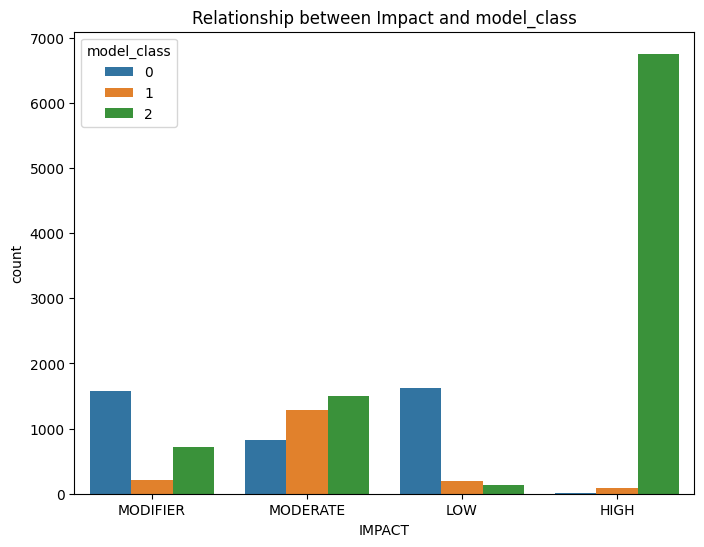

In [30]:
pd.set_option("display.max_rows", 10)

na_impact = ann_df["IMPACT"].isna().sum()
ann_df["IMPACT"].value_counts()

plt.figure(figsize=(8, 6))
sns.countplot(x="IMPACT", hue="model_class", data=ann_df)
plt.title("Relationship between Impact and model_class")
plt.show()


We can see that the variants that have a high impact are related with variants that are pahtogenic. Variants that have impact Low are more related with benign variants. Modifier seems to be more related with benign variants and moderate to uncertain significance variants (taking into account that we have larger amount of variants that are pathogenic).
It seems that it can be a useful variable for the model to correctly predict the pathogenicity of the variants.

In [31]:
ann_df["SYMBOL"].value_counts()


BRCA2            3923
BRCA1            3339
PAH               725
MLH1              646
MSH2              554
                 ... 
GDPD4               2
RAG1                2
KCTD3               1
NPAT                1
RP11-445H22.3       1
Name: SYMBOL, Length: 86, dtype: int64

We can see again that symbol has the same counts and length as Genes. This is because symbol refers to the symbol of the gene, so it's the abbreviation of the gene name.
We can consider taking the symbol of the gene instead of the EnsemblID as it is easier to interpret.

In [32]:
ann_df["BIOTYPE"].value_counts()

protein_coding    14918
antisense             1
Name: BIOTYPE, dtype: int64

Despite it seems that this column contains no information as it is almost constant, it has a lot of biological sense for our model because this value is showing us that all the variants considered are in protein coding regions which is between (1-2%) of the total DNA. This has a great importance because our model will only be trained in protein coding regions and consequently cannot be used to classify non protein-coding variants.

We can also consider to eliminate the antisense variant which we can investigate deeply:

In [33]:
pd.set_option('display.max_columns', None)

antisense = ann_df[ann_df["BIOTYPE"] == "antisense"]
antisense

,Chrom,Pos,Ref,Alt,CLNSIG,model_class,Consequence,IMPACT,SYMBOL,Gene,BIOTYPE,EXON,INTRON,cDNA_position,CDS_position,Protein_position,FLAGS,VARIANT_CLASS,SYMBOL_SOURCE,GENE_PHENO,SIFT,PolyPhen,SIFT_pred,SIFT_score,SpliceAI_pred_DS_AG,SpliceAI_pred_DS_AL,SpliceAI_pred_DS_DG,SpliceAI_pred_DS_DL,SpliceAI_pred_SYMBOL,CSQ,Ref_Alt_Dif
3750,20,43280227,C,T,Benign,0,downstream_gene_variant,MODIFIER,RP11-445H22.3,ENSG00000132832,antisense,,,,,,,SNV,Clone_based_vega_gene,NaN,,,,,0.0,0.0,0.0,0.0,ADA,T|downstream_gene_variant|MODIFIER|RP11-445H22...,0


If we take a deeper look at the antisense variant we can see that it is a Benign variant. The antisense biotype will give us no information as no all the antisense variants are benign and could confuse the model. A good aproach could be to inform the users that the model can only be used in protein coding variants and eliminate this variant and the column biotype as it would be constant.

In [52]:
# We drop the biotype column as will give no information (constant)
ann_df = ann_df.drop(columns=["BIOTYPE"])

In [34]:
ann_df = ann_df.drop(index=3750)

Exon column indicates the exon that is affecting the variant in respect to the total amount of exons that the transcript has.

In [35]:
pd.set_option('display.max_columns', 15)
ann_df["EXON"].unique()

array(['', '46/58', '39/58', '24/58', '5/14', '3/3', '2/3', '1/3',
       '71/72', '65/72', '63/72', '42/72', '39/72', '38/72', '22/72',
       '18/72', '13/72', '11/72', '10/13', '5/13', '37/47', '34/47',
       '15/47', '22/22', '20/22', '19/22', '17/22', '14/22', '13/22',
       '12/22', '10/22', '8/22', '7/22', '6/22', '5/22', '4/22', '3/22',
       '2/22', '1/22', '1/16', '2/16', '3/16', '5/16', '6/16', '7/16',
       '8/16', '9/16', '10/16', '11/16', '12/16', '13/16', '15/16',
       '16/16', '1/10', '2/10', '3/10', '4/10', '5/10', '6/10', '9/10',
       '10/10', '11/17', '9/17', '6/17', '3/17', '2/17', '1/17', '1/19',
       '2/19', '3/19', '4/19', '5/19', '6/19', '8/19', '9/19', '10/19',
       '11/19', '12/19', '14/19', '16/19', '17/19', '18/19', '19/19',
       '7/21', '14/21', '15/21', '8/8', '4/16', '14/16', '5/31', '10/31',
       '25/31', '15/15', '14/15', '13/15', '11/15', '7/15', '5/15',
       '4/15', '3/15', '1/4', '2/21', '3/21', '5/21', '9/21', '12/21',
       '18/1

Let's see how many variants don't belong to any exon

In [36]:
(ann_df["EXON"] == "").sum()


2759

Is the pathogenicity of a variant related to if the variant is in an exon?

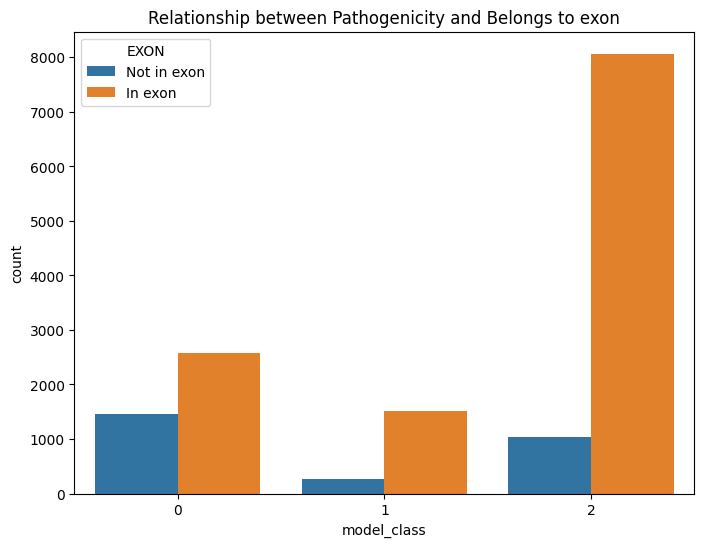

In [37]:
# Create a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x="model_class", hue=ann_df["EXON"].apply(lambda x: "Not in exon" if x == "" else "In exon"), data=ann_df)
plt.title("Relationship between Pathogenicity and Belongs to exon")
plt.show()

We have to take into account that only 2760 variants are not located in an exon and around 1500 of them are classified as benign. Otherwise, uncertain significate and pathogenic variants tend to be located in an exon.

Let's investigate the INTRON column:

In [38]:
ann_df["INTRON"].unique()

array(['55/57', '', '20/57', '5/57', '70/71', '14/46', '20/21', '16/21',
       '13/21', '8/21', '1/15', '6/15', '7/15', '8/15', '9/15', '10/15',
       '11/15', '12/15', '13/15', '15/15', '1/9', '2/9', '3/9', '4/9',
       '5/9', '6/9', '7/9', '8/9', '9/9', '10/16', '6/16', '5/16', '1/18',
       '2/18', '3/18', '4/18', '5/18', '6/18', '7/18', '9/18', '10/18',
       '11/18', '12/18', '13/18', '14/18', '15/18', '17/18', '13/20',
       '4/15', '11/14', '7/14', '6/14', '5/14', '3/14', '1/3', '4/20',
       '15/20', '17/17', '11/17', '1/8', '2/8', '3/8', '4/8', '7/8',
       '8/8', '6/7', '7/7', '28/49', '8/62', '17/62', '3/22', '5/5',
       '13/13', '11/13', '10/13', '7/13', '6/13', '5/13', '4/13', '3/13',
       '1/13', '3/15', '5/15', '2/26', '3/26', '4/26', '6/26', '7/26',
       '8/26', '9/26', '10/26', '11/26', '12/26', '13/26', '14/26',
       '15/26', '16/26', '17/26', '18/26', '19/26', '20/26', '21/26',
       '24/26', '25/26', '28/39', '26/39', '19/39', '7/10', '9/12',
      

It's encoded as the exon column: number of the intron where the variant is located / total amount of introns in the transcript.

In [39]:
(ann_df["INTRON"] == "").sum()


12884

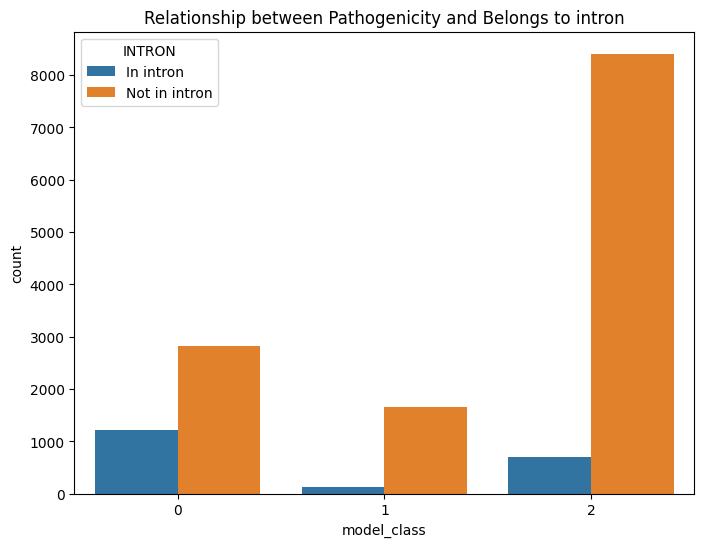

In [40]:
# Create a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x="model_class", hue=ann_df["INTRON"].apply(lambda x: "Not in intron" if x == "" else "In intron"), data=ann_df)
plt.title("Relationship between Pathogenicity and Belongs to intron")
plt.show()


It seems that the pattern of intron variants is the same that the one in the exon variants but inverse, intron variants exhibit a tendency towards benign classification.



We can see how many variants are neither in an intron or an exon:

In [41]:
not_intron_exon = ann_df[(ann_df["EXON"] == "") & (ann_df["INTRON"] == "")]
len(not_intron_exon)

806

We have 806 variants that are not present neither in an exon or an intron. Let's see it's distribution agains the pathogenicity of the variants:

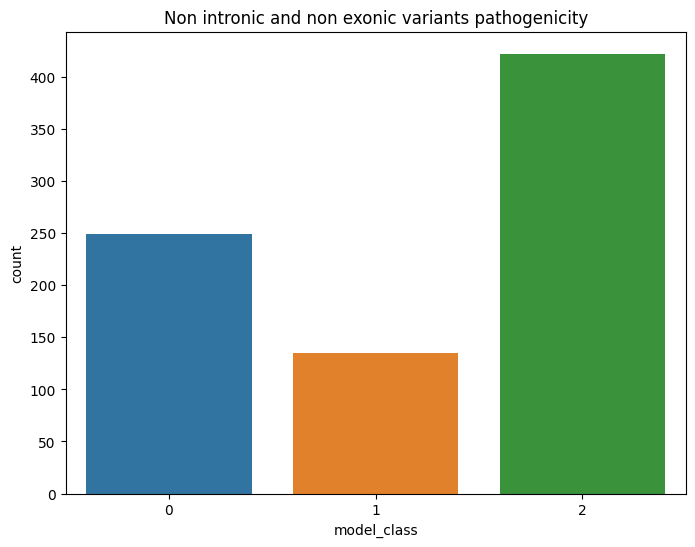

In [42]:
# Create a count plot
plt.figure(figsize=(8, 6))
sns.countplot(x="model_class", data=not_intron_exon)
plt.title("Non intronic and non exonic variants pathogenicity")
plt.show()

If it does not belong to a intron or exon don't seems to have any impact on the classification as we initially have the same proportions of pathogenicity as the initial dataframe

The cDNA position refers to the position of the variant in the transcript. If it does not belong to the transcript it is encoded as "".

In [43]:
ann_df["cDNA_position"].value_counts()

             2798
1098           10
1221            8
1038            8
424             8
             ... 
5930            1
4327-4328       1
5937            1
4318            1
70              1
Name: cDNA_position, Length: 7769, dtype: int64

We have 2798 variants that does not belong to a transcript. Let's see if the variant belonging on a transcript have any influence on our prediction:

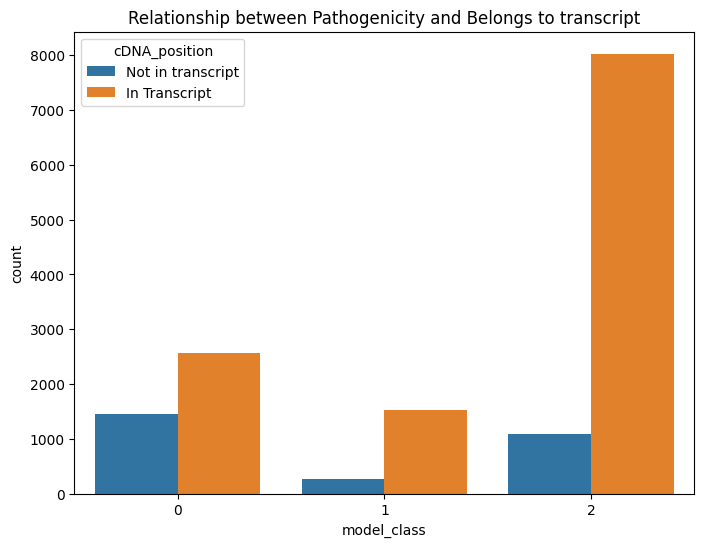

In [44]:
# Create a bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x="model_class", hue=ann_df["cDNA_position"].apply(lambda x: "Not in transcript" if x == "" else "In Transcript"), data=ann_df)
plt.title("Relationship between Pathogenicity and Belongs to transcript")
plt.show()

We can see that it have a very similar distribution as the graphics previously performed. This makes sense as if the variant is into an exon or an intron, it will be transcribed and consequently will be contained in the transcript. Intron, exon and cDNA position seem to be related variables.

In [45]:
ann_df["cDNA_pos"] = ann_df["cDNA_position"].apply(lambda x: str(x).split("-")[0] if "-" in str(x) else x)

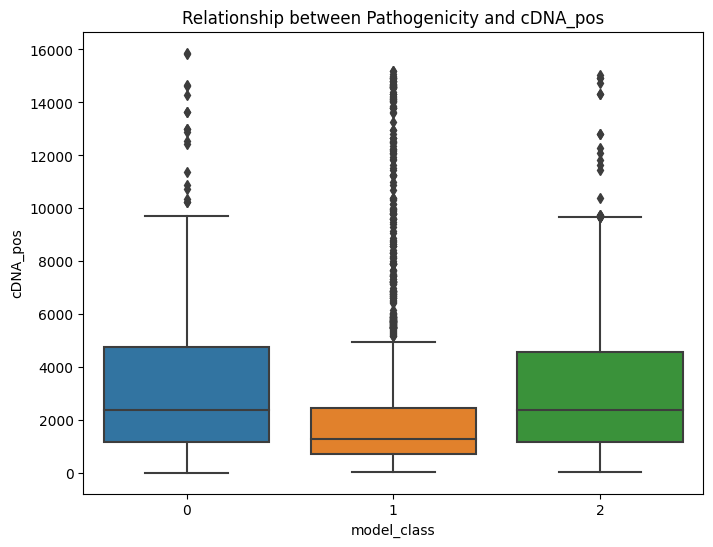

In [46]:
ann_df["cDNA_pos"] = pd.to_numeric(ann_df["cDNA_pos"], errors="coerce")
plt.figure(figsize=(8, 6))
sns.boxplot(x="model_class", y="cDNA_pos", data=ann_df)
plt.title("Relationship between Pathogenicity and cDNA_pos")
plt.show()

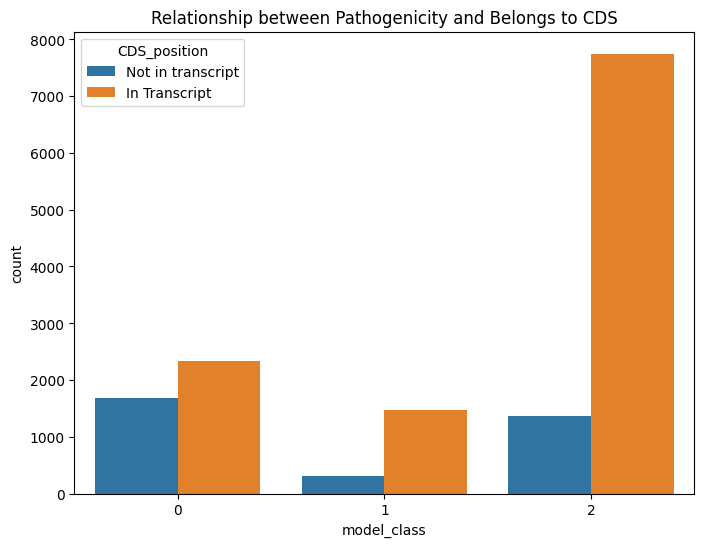

In [47]:
plt.figure(figsize=(8, 6))
sns.countplot(x="model_class", hue=ann_df["CDS_position"].apply(lambda x: "Not in transcript" if x == "" else "In Transcript"), data=ann_df)
plt.title("Relationship between Pathogenicity and Belongs to CDS")
plt.show()

We again obtain the same information as cDNA_position. It makes biological sense as the variants that are transcribed are the only ones that can be traduced and having an effect into proteins.

Maybe we could consider only to take one of the cDNA position, CDS position, intron and exon to run the model as it seens to represent the same information

It seems that uncertain significate variants has a lower median than the pathogenic and benign variants. Also, uncertain significate variants are more abundant over cDNA pos 10.000 (we have also to take into account that uncertain significate varaints are the ones that are lower represented) so the cDNA position could be a factor that could help us to predict correctly uncertain significate variants.

CDS_position is the position of the variant over the protein.

In [48]:
ann_df["CDS_position"].value_counts()


             3351
1              13
488            11
892            11
2              11
             ... 
2833-2834       1
2832-2833       1
2830-2831       1
2829-2830       1
1148-1159       1
Name: CDS_position, Length: 7316, dtype: int64

We will take the first number as reference when a variant affects more than 1 position. We can see that 3352 variants have no effect over proteins.

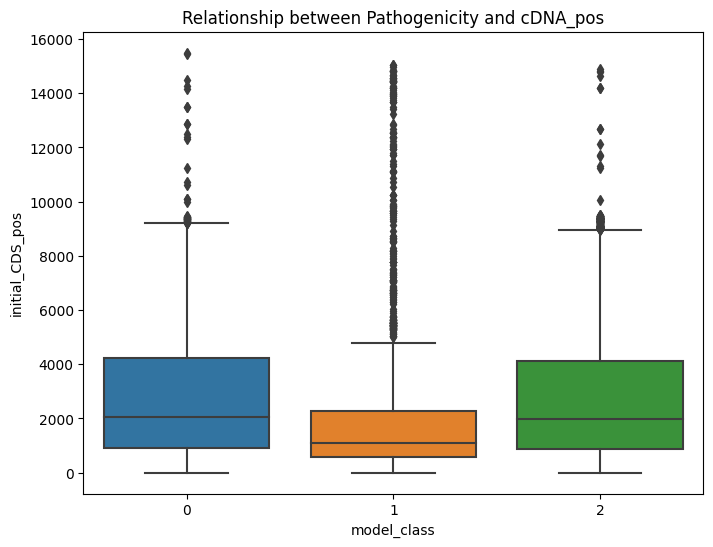

In [49]:
ann_df['initial_CDS_pos'] = ann_df['CDS_position'].apply(lambda x: str(x).split('-')[0] if '-' in str(x) else x)
ann_df['initial_CDS_pos'] = pd.to_numeric(ann_df['initial_CDS_pos'], errors='coerce')
plt.figure(figsize=(8, 6))
sns.boxplot(x='model_class', y='initial_CDS_pos', data=ann_df)
plt.title('Relationship between Pathogenicity and cDNA_pos')
plt.show()

We can see that it's an almost identical distribution as CDS position. It makes biological sense as the position of the variant in the transcript will have a direct impact to the position of the variant over the protein. So it seems to be redundant variables.

We have seen that intron, exon, in CDS and in cDNA have big amount of redundancy. Let's explore the combination of these variables to see if we can take any insight.

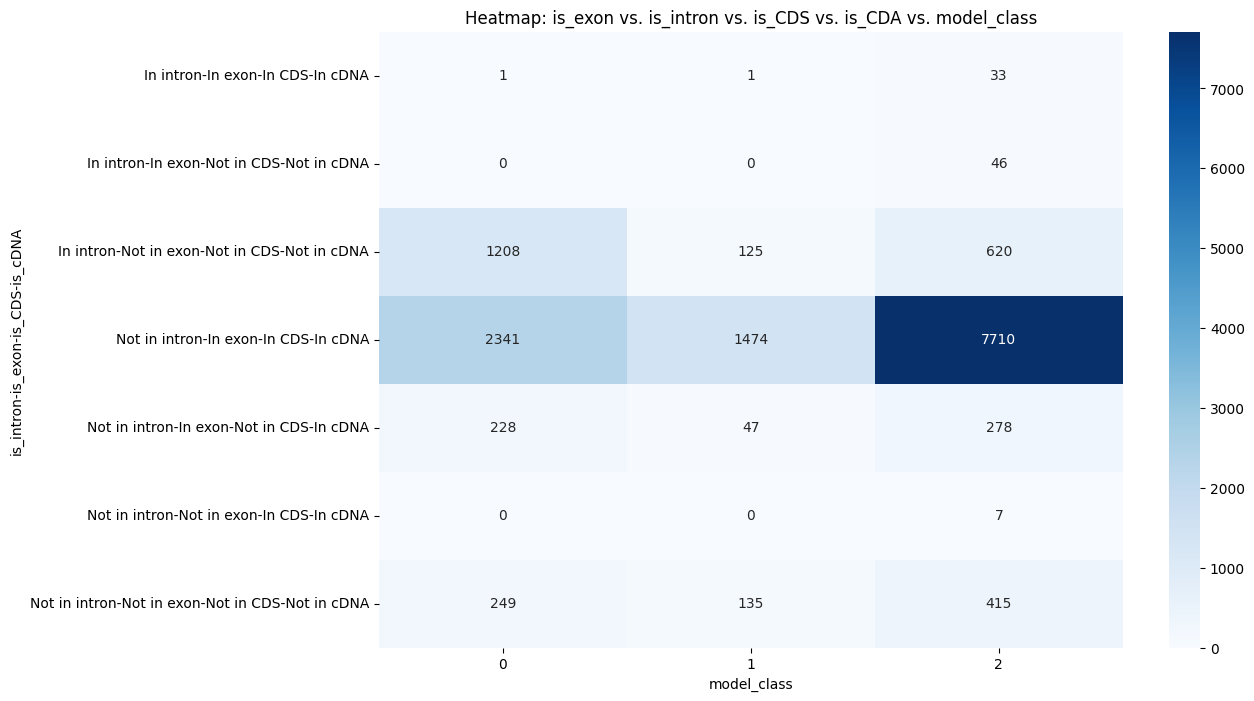

Not in intron    12884
In intron         2034
Name: is_intron, dtype: int64

In [50]:
ann_df["is_intron"] = ann_df['INTRON'].apply(lambda x: 'Not in intron' if x == '' else 'In intron')

ann_df["is_exon"] = ann_df['EXON'].apply(lambda x: 'Not in exon' if x == '' else 'In exon')
ann_df["is_CDS"] = ann_df['CDS_position'].apply(lambda x: 'Not in CDS' if x == '' else 'In CDS')
ann_df["is_cDNA"] = ann_df['cDNA_position'].apply(lambda x: 'Not in cDNA' if x == '' else 'In cDNA')


# Create a cross-tabulation of the five variables
cross_tab = pd.crosstab(index=[ann_df['is_intron'], ann_df['is_exon'], ann_df['is_CDS'], ann_df['is_cDNA']], columns=ann_df['model_class'])

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Heatmap: is_exon vs. is_intron vs. is_CDS vs. is_CDA vs. model_class')
plt.show()
ann_df["is_intron"].value_counts()
# ann_df["is_exon"].value_counts()

We can see that variants that are located in intron, but not in exon, CDS and cDNA have a large ratio of benign variants (that are initially less represented than the pathogenic). The other seems to respect the initial proportion of variants for each group. We can also observe that variants that are in introns, exons, but not in CDS or cDNA are all 46 variants classified as pathogenic.

In [53]:
ann_df["FLAGS"].value_counts()


                           14489
cds_start_NF                 364
cds_start_NF&cds_end_NF       63
cds_end_NF                     2
Name: FLAGS, dtype: int64

Most of variants have no flag. Let's see it's distribution:

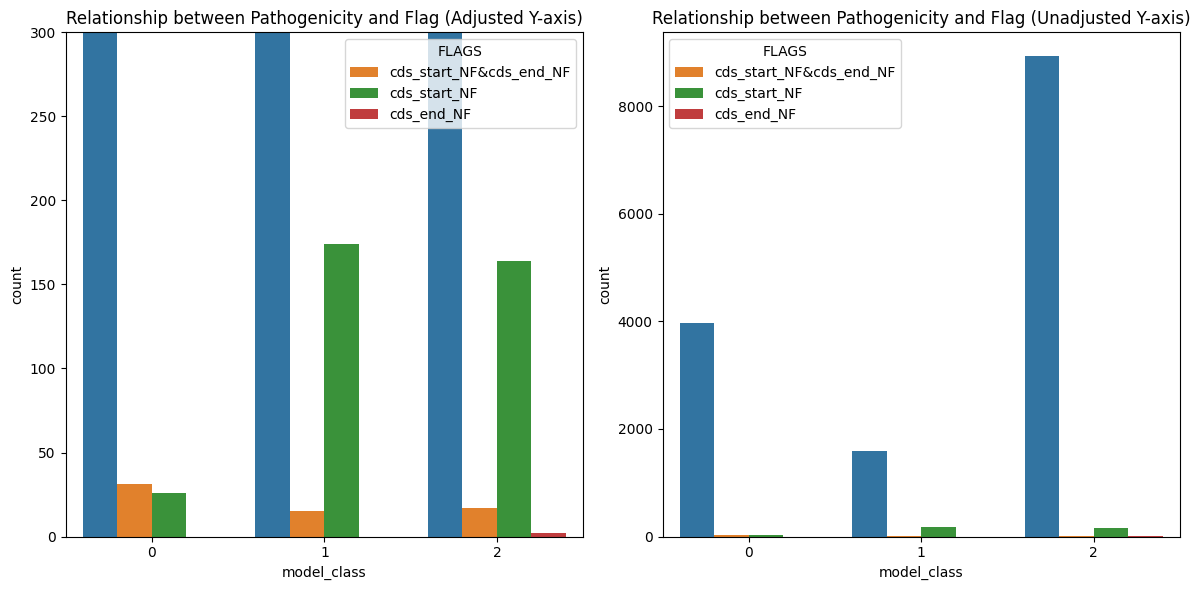

In [55]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the countplot on the primary y-axis in the first subplot
sns.countplot(x="model_class", hue="FLAGS", data=ann_df, ax=ax1)
ax1.set_title('Relationship between Pathogenicity and Flag (Adjusted Y-axis)')
ax1.set_ylim(0, 300)

# Plot the countplot on the secondary y-axis in the second subplot
sns.countplot(x="model_class", hue="FLAGS", data=ann_df, ax=ax2)
ax2.set_title('Relationship between Pathogenicity and Flag (Unadjusted Y-axis)')

# Show the plot
plt.tight_layout()
plt.show()

We can see that the proportions of na values (in blue) seems to respect the original ration. However, cds_start. cdsemd amd cds_start&cds_end don't seems to respect the original ration of pathogenicity. However, these variants account for a low proportion of the total variants as we can see in the graph that is not adjusted in the y axis.

In [56]:
ann_df["VARIANT_CLASS"].value_counts()

SNV             9355
deletion        3611
insertion       1704
indel            207
substitution      41
Name: VARIANT_CLASS, dtype: int64

We can see that in variant class it is encoded if a variant is a SNV, deletion, insertion, indel or substitution. Before we have already seen this variables and said that deletions tends to be more frequent, what is confirmed here. If we look at its relationship with pathogenicity:

Text(0.5, 1.0, 'Relationship between Pathogenicity and Variant class')

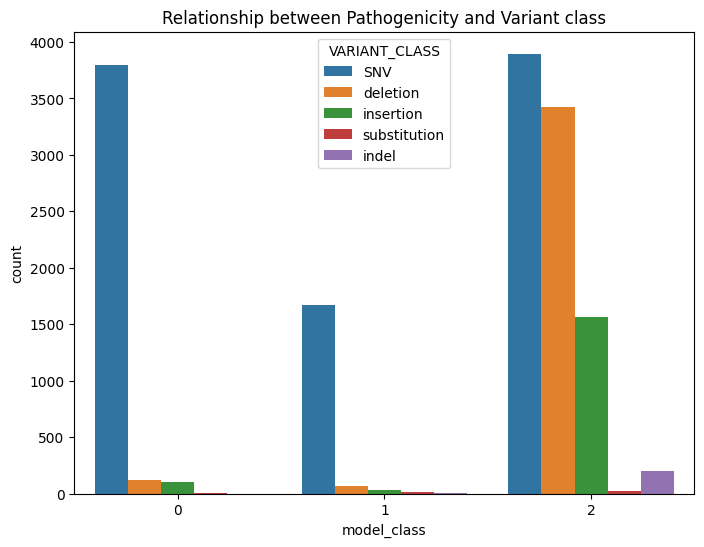

In [57]:
# Create a countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='model_class', hue='VARIANT_CLASS', data=ann_df)
plt.title('Relationship between Pathogenicity and Variant class')

We can observe that most of the insertions or deletions and indels are pathogenic mutations. The SNV variants are equally classified as benign or pathogenic variants which could give us information over pathogenicity classification.
This column gives us more insights than the previously created column which gives information about the length of the insertions-deletion (which is 0 for SNPs). We can later check which of the 2 columns gives more accuracy to the model.

Let's see the gene pheno column which indicates if a variant is related with a phenotype in a bynary mode (1 or nan).

In [58]:
ann_df["GENE_PHENO"]
ann_df["GENE_PHENO"].isna().sum()

486

486 variants are not related to a phenotype.

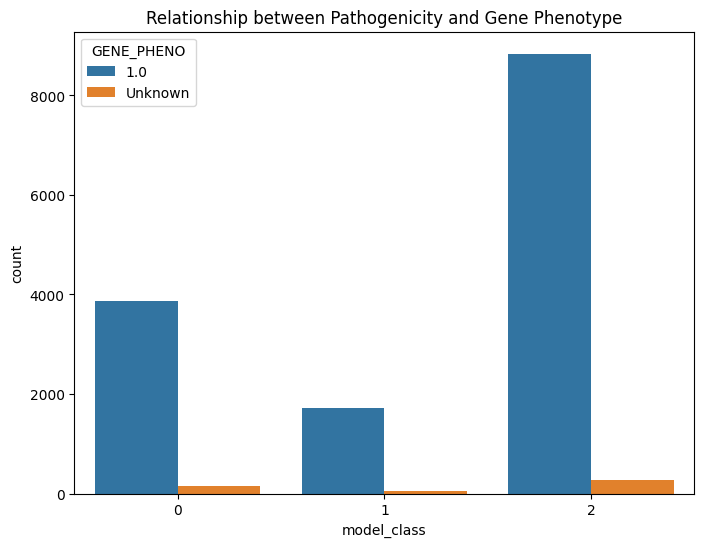

In [59]:

ann_df['GENE_PHENO'] = ann_df['GENE_PHENO'].fillna('Unknown')
# Create a countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='model_class', hue='GENE_PHENO', data=ann_df)
plt.title('Relationship between Pathogenicity and Gene Phenotype')

# Show the plot
plt.show()

Not seems to have any implication the phenotype over pathogenicity as it is respected the initial proportions of pathogenicity.

In [60]:
ann_df['SIFT'].unique()



array(['', 'deleterious(0.01)', 'tolerated(0.23)', 'tolerated(0.12)',
       'tolerated(1)', 'deleterious(0.05)', 'tolerated(0.56)',
       'deleterious(0.03)', 'deleterious(0.04)', 'tolerated(0.1)',
       'tolerated(0.17)', 'deleterious(0)', 'tolerated(0.44)',
       'tolerated(0.35)', 'tolerated(0.08)', 'tolerated(0.28)',
       'tolerated(0.3)', 'tolerated_low_confidence(0.36)',
       'tolerated(0.09)', 'tolerated(0.06)', 'tolerated(0.14)',
       'deleterious_low_confidence(0)', 'tolerated_low_confidence(0.58)',
       'tolerated(0.29)', 'tolerated(0.2)', 'tolerated(0.15)',
       'tolerated(0.64)', 'tolerated(0.25)', 'tolerated(0.27)',
       'tolerated(0.31)', 'tolerated(0.36)', 'tolerated(0.76)',
       'tolerated(0.13)', 'tolerated(0.59)', 'tolerated(0.65)',
       'tolerated(0.21)', 'deleterious(0.02)', 'tolerated(0.6)',
       'tolerated(0.39)', 'tolerated(0.81)', 'tolerated(0.4)',
       'tolerated(0.7)', 'tolerated_low_confidence(0.24)',
       'tolerated(0.24)', 'tolerat

Sift column is encoded as a categorical variable including also a numerical score. Let's extract the information in this column:

In [61]:
# Extract category and value using regular expression
ann_df[['sift_category', 'sift_score']] = ann_df['SIFT'].str.extract(r'([a-zA-Z_]+)\(([\d.]+)\)')

We have to take into account that most of the variants don't have a sift_category or value

In [62]:
ann_df["sift_category"].isna().sum()

11411

In [63]:
ann_df['sift_category'] = ann_df['sift_category'].replace("-1", pd.NA)
ann_df["sift_category"].unique()

array([nan, 'deleterious', 'tolerated', 'tolerated_low_confidence',
       'deleterious_low_confidence'], dtype=object)

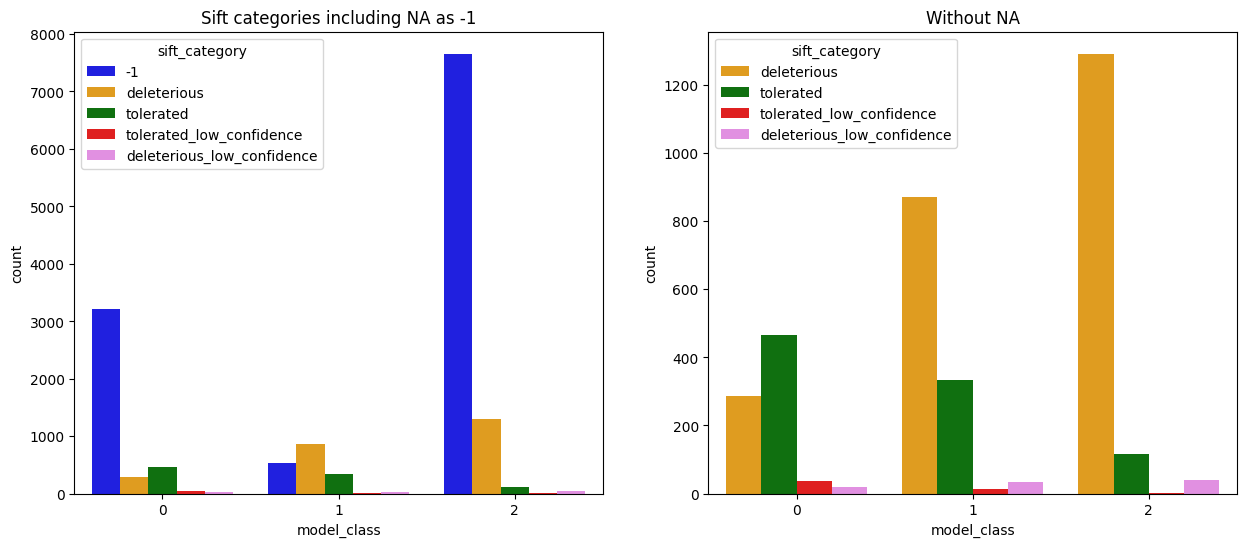

In [64]:
ann_df["sift_category"].value_counts()
# ann_df['sift_category'] = ann_df['sift_category'].replace(-1, pd.NA)

# specifying colors to mantain the same for the same sift category
custom_palette = {'deleterious': 'orange', 'tolerated': 'green', 'tolerated_low_confidence': 'red', 'deleterious_low_confidence': 'violet', '-1': 'blue'}


# Create a single figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot without NA
sns.countplot(x='model_class', hue='sift_category', data=ann_df.fillna('-1'), ax=axes[0], palette=custom_palette)
axes[0].set_title('Sift categories including NA as -1')

# Plot with NA as -1
sns.countplot(x='model_class', hue='sift_category', data=ann_df, ax=axes[1], palette=custom_palette)
axes[1].set_title('Without NA')

plt.show()


Seems that variants classified as tolerated are more prone to be benign or Uncertain significance taking into account the initial ratios. Variants that are not scored seems to be in a low frequency to the uncertain significance category. It could help to improve the model.

              count      mean       std  min   25%   50%     75%  max
model_class                                                          
0             808.0  0.220606  0.281080  0.0  0.02  0.10  0.3125  1.0
1            1250.0  0.092352  0.199548  0.0  0.00  0.01  0.0700  1.0
2            1449.0  0.023347  0.095643  0.0  0.00  0.00  0.0100  1.0


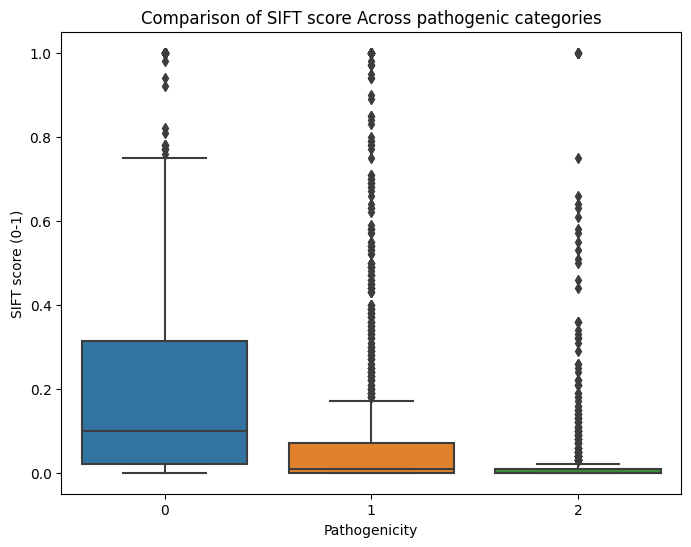

In [65]:
# Box plot or violin plot
ann_df["model_class"] = ann_df["model_class"].astype("category")
# ann_df["model_class"].dtype
ann_df["sift_score"].describe
ann_df["sift_score"] = ann_df["sift_score"].astype(float)
no_na_sift_values = ann_df.dropna(subset=["sift_score"])

# calculate quartiles to make interpretations easier
quartiles_by_model_class = no_na_sift_values.groupby("model_class")["sift_score"].describe()

print(quartiles_by_model_class)

plt.figure(figsize=(8, 6))
sns.boxplot(x="model_class", y="sift_score", data=no_na_sift_values)
plt.title("Comparison of SIFT score Across pathogenic categories")
plt.xlabel("Pathogenicity")
plt.ylabel("SIFT score (0-1)")
plt.show()

# ann_df["sift_score"].to_numeric()

It seems that pathogenic variants tends to have a very low score (75% of pathogenic variants have a sift score between 0-0.01). The benign variants tend to also have a more elevated sift score than uncertain significance  and pathogenic variants. The Sift score could help the model.

We can take also a look at variants that has sift score of na:

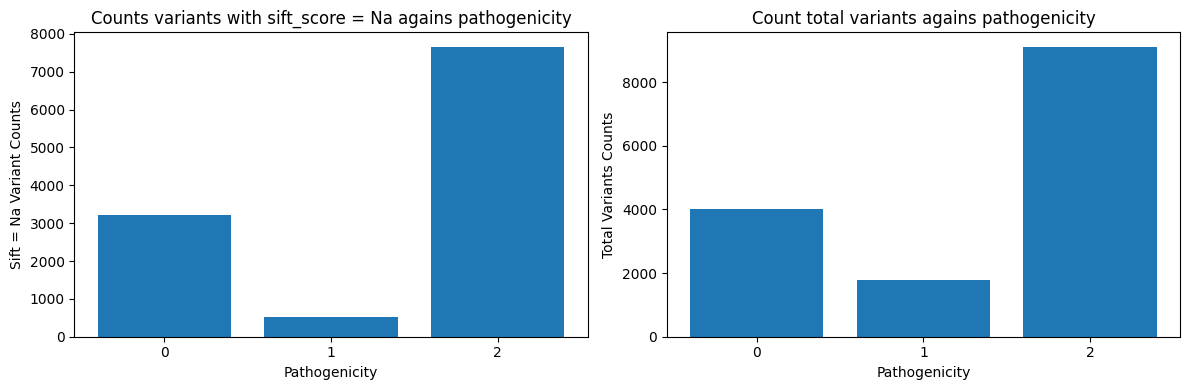

In [66]:

ann_df["model_class"] = ann_df["model_class"].astype("category")

na_sift = ann_df[ann_df["sift_score"].isna()]

path_sift_value_counts = na_sift["model_class"].value_counts()

model_value_counts = ann_df["model_class"].value_counts()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot the first graph on the left subplot (ax1)
ax1.bar(path_sift_value_counts.index, path_sift_value_counts)
ax1.set_title("Counts variants with sift_score = Na agains pathogenicity")
ax1.set_xlabel("Pathogenicity")
ax1.set_ylabel("Sift = Na Variant Counts")
ax1.set_xticks([0, 1, 2])  # Set specific x-axis ticks

# Plot the second graph on the right subplot (ax2)
ax2.bar(model_value_counts.index, model_value_counts)
ax2.set_title("Count total variants agains pathogenicity")
ax2.set_xlabel("Pathogenicity")
ax2.set_ylabel("Total Variants Counts")
ax2.set_xticks([0, 1, 2])  # Set specific x-axis ticks
# Adjust layout to prevent clipping of titles and labels
plt.tight_layout()

# Show the plots
plt.show()

It seems that the distribution is more or less the same as the one obtained by counting the total counts of the column that we want to predict model class column. The number of Uncertain significance is the only one that decreases substantially when looking to variants sift_score with na values

Let's investigate SpliceAI columns. SpliceAI indicates the effect of the variant being involved in splicing. SpliceAI values are given information about splicing variants, let's see if they are correlated.

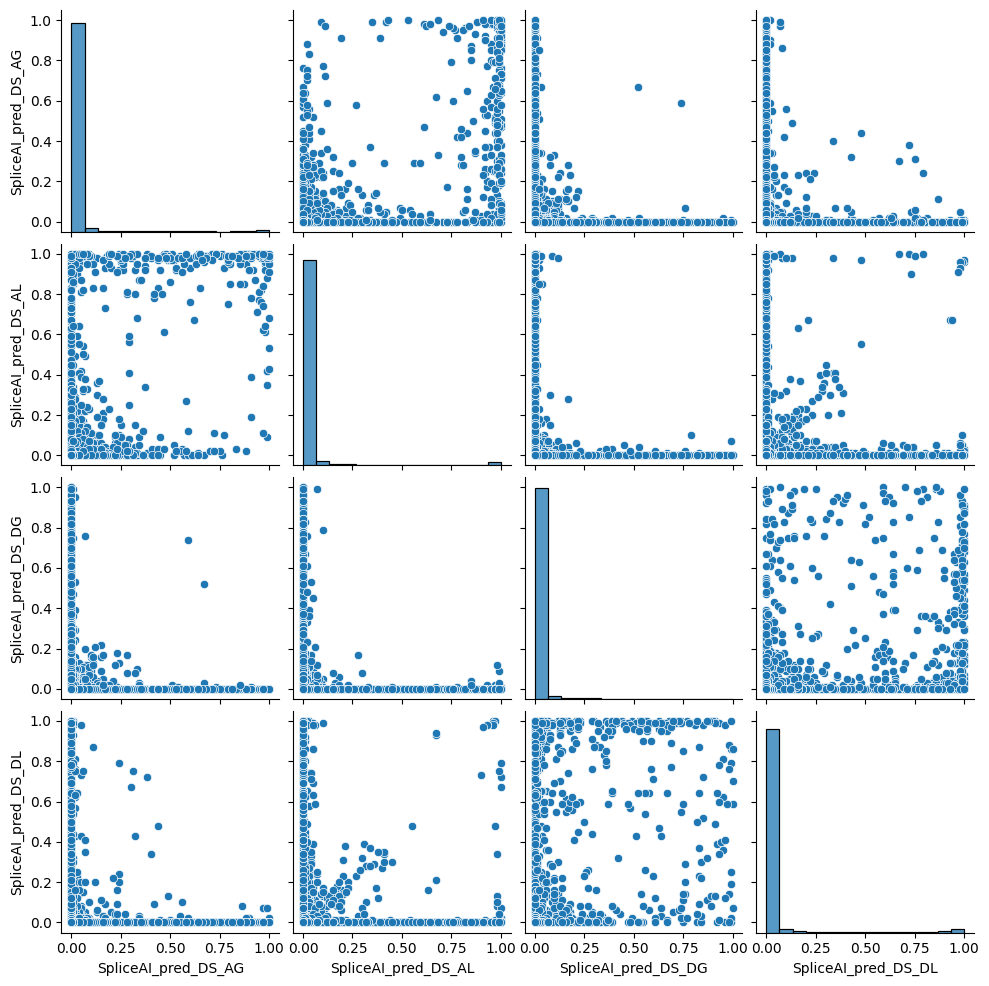

In [67]:
sns.pairplot(ann_df[["SpliceAI_pred_DS_AG", "SpliceAI_pred_DS_AL", "SpliceAI_pred_DS_DG", "SpliceAI_pred_DS_DL"]])
plt.show()

In this pair plot we can see that the different spliceai predictors are not correlate between each other. So eliminating some column we may be losing information about. Let's see how these columns could affect the predicted category.

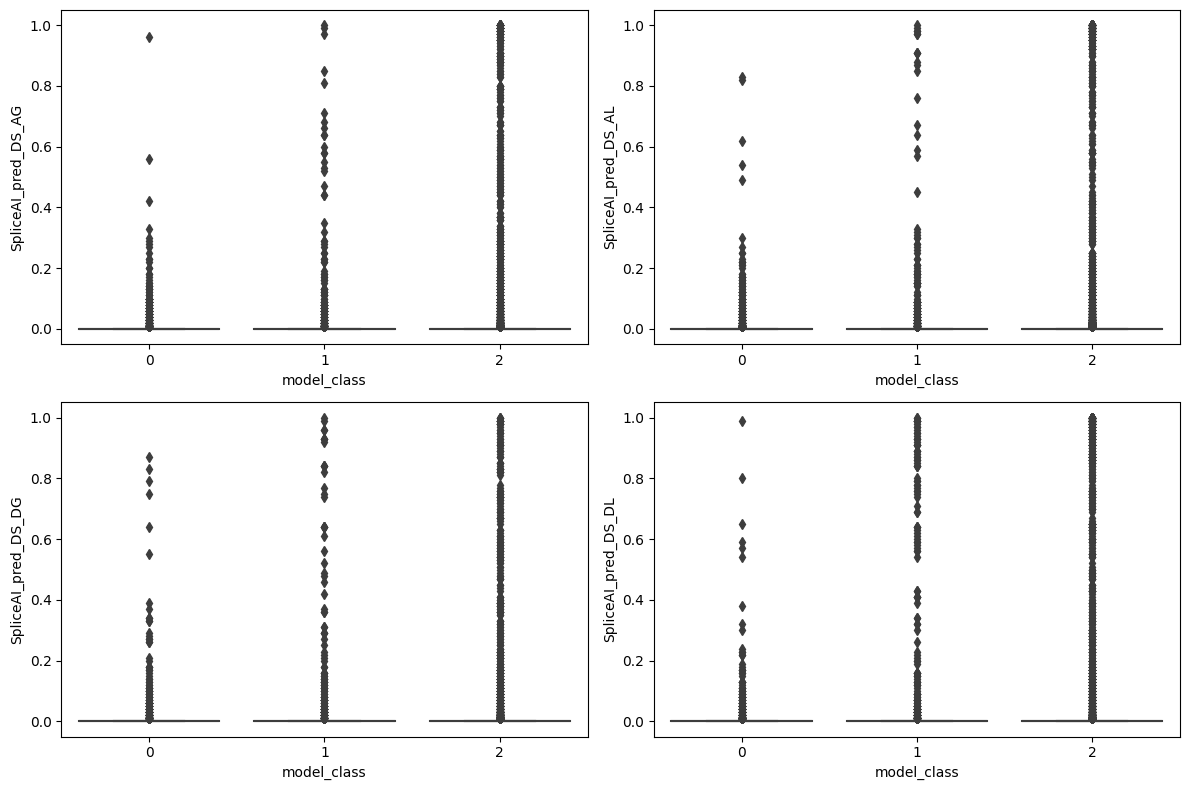

In [68]:
# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot box plots for each numerical variable grouped by the categorical variable
sns.boxplot(x='model_class', y='SpliceAI_pred_DS_AG', data=ann_df, ax=axes[0, 0])
sns.boxplot(x='model_class', y='SpliceAI_pred_DS_AL', data=ann_df, ax=axes[0, 1])
sns.boxplot(x='model_class', y='SpliceAI_pred_DS_DG', data=ann_df, ax=axes[1, 0])
sns.boxplot(x='model_class', y='SpliceAI_pred_DS_DL', data=ann_df, ax=axes[1, 1])

# Adjust layout to prevent clipping of titles and labels
plt.tight_layout()

# Show the plots
plt.show()

All the SpliceAI variables tends to have a low value for all pathogenic categories. However. It seems that it is less probable to find higher values (above 0.8) for benign variants compared to pathogenic variants. Whereas Uncertain significance variants have some variants with high spliceai values.

Once we have analysed all the categories that we are interested in, let's run the model to see which is it's prediction accuracy.

Accuracy: 79.58%


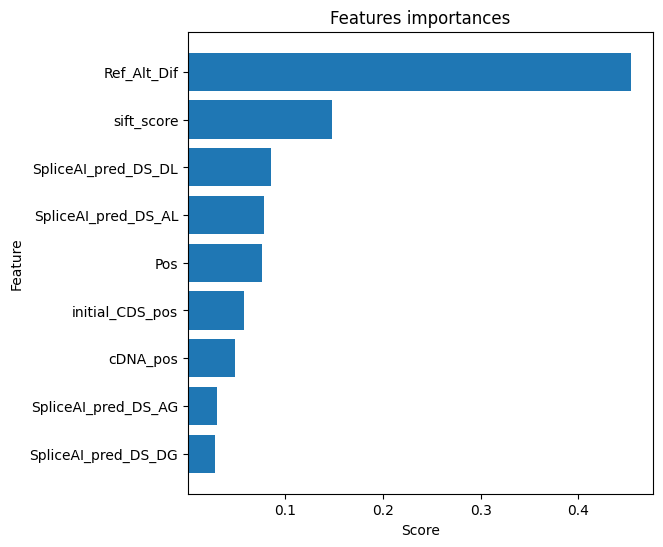

               feature     score
0          Ref_Alt_Dif  0.452586
1           sift_score  0.147173
2  SpliceAI_pred_DS_DL  0.084743
3  SpliceAI_pred_DS_AL  0.077193
4                  Pos  0.075320
5      initial_CDS_pos  0.057428
6             cDNA_pos  0.048245
7  SpliceAI_pred_DS_AG  0.029385
8  SpliceAI_pred_DS_DG  0.027927


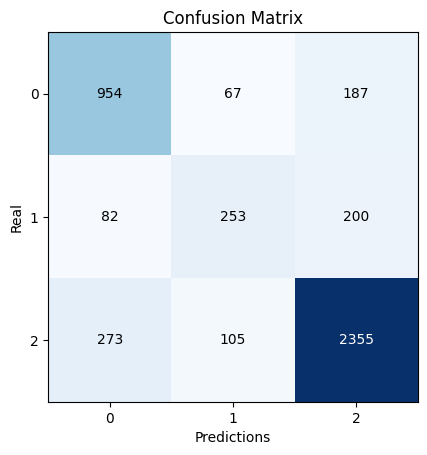

In [69]:
ann_df["model_class"] = pd.to_numeric(ann_df["model_class"])

classifier(ann_df , "model_class")

We can see that we have improved around 10% of the accuracy compared to the initial model. We can see that the variables that have adquired more importance in the model are the ones that we had to manipulate in order to be able to graphically represent properly it's behaviour (Ref_Alt_Dif and sift_score). Let's try to increase the accuracy of the model by doing some feature engineering.

FEATURE ENGINEERING

First of all we will encode the Ref and Alt allele as the change in SNV or NA if they are insertions/deletions.

In [70]:
import numpy as np
# Create a dictionary to map each nucleotide change to a numeric value
nucleotide_mapping = {
    'A>C': 1,
    'A>G': 2,
    'A>T': 3,
    'C>A': 4,
    'C>G': 5,
    'C>T': 6,
    'G>A': 7,
    'G>C': 8,
    'G>T': 9,
    'T>A': 10,
    'T>C': 11,
    'T>G': 12
}

ann_df["nucleotide_change"] = np.where((ann_df["Ref"].str.len() == 1) & (ann_df["Alt"].str.len() == 1), ann_df["Ref"] + ">" + ann_df["Alt"], -1)

ann_df["nucleotide_change"] = ann_df["nucleotide_change"].map(nucleotide_mapping)

We have also seen that there are 2 genes: BRCA1 and BRCA2 which contain great amount of described variants and there is a big bias of variant to be benign or pathogenic in these genes, being almost none the number of uncertain significance variants. Let's encode this variable as a boolean representing if the variants is in the genes BRCA1 or BRCA2.

In [71]:
ann_df['in_BRA_genes'] = (ann_df['Gene'].isin(["ENSG00000139618", "ENSG00000012048"])).astype(int)


In [72]:
ann_df["in_BRA_genes"].value_counts()

0    7656
1    7262
Name: in_BRA_genes, dtype: int64

We have seen that the impact column could have a high influence to correctly predict the variant pathogenicity:

In [73]:
ann_df["IMPACT"].value_counts()

HIGH        6851
MODERATE    3607
MODIFIER    2499
LOW         1961
Name: IMPACT, dtype: int64

We will conver the variable IMPACT to numeric by encoding it's categories as numeric values to be able to be parsed by the model:

In [74]:
ann_df['Impact_value'] = ann_df['IMPACT'].astype('category').cat.codes

In [75]:
ann_df["Impact_value"].value_counts()

0    6851
2    3607
3    2499
1    1961
Name: Impact_value, dtype: int64

We will create a numeric combination to have encoded as a single number the combination of the variant to be in intron, in exon, is CDS and cDNA.

For example:

Value of 0 don't belong to any of these categories.

Value of 1, the variant is in a cDNA,

Value of 3, the variant is in CDS and in cDNA.

Value of 15, the variant is intronic, exonic, in CDS and in cDNA.

In [76]:
# Create binary columns
ann_df["is_intron_numeric"] = (ann_df['INTRON'] != '').astype(int)
ann_df["is_exon_numeric"] = (ann_df['EXON'] != '').astype(int)
ann_df["is_CDS_numeric"] = (ann_df['CDS_position'] != '').astype(int)
ann_df["is_cDNA_numeric"] = (ann_df['cDNA_position'] != '').astype(int)

# Combine binary columns into a single numeric column
ann_df["combined_numeric"] = ann_df["is_intron_numeric"] * 8 + ann_df["is_exon_numeric"] * 4 + ann_df["is_CDS_numeric"] * 2 + ann_df["is_cDNA_numeric"]

columns_to_drop = ["is_intron_numeric", "is_exon_numeric", "is_CDS_numeric", "is_cDNA_numeric"]
ann_df = ann_df.drop(columns=columns_to_drop)


In [77]:
ann_df["combined_numeric"].value_counts()

7     11525
8      1953
0       799
5       553
12       46
15       35
3         7
Name: combined_numeric, dtype: int64

From the SIFT columns, we have finally decided to include the sift category as a numeric value in the dataframe to be parsed by the model.

In [78]:
ann_df["sift_category"]

ann_df['sift_category_num'] = ann_df['sift_category'].fillna('-1').astype('category').cat.codes

# remove sift score as it's the redundant information incorporated by sift_category_num
ann_df = ann_df.drop(columns=["sift_score"])


In [79]:
# na values are represented as 0 because we fill na with string "-1" and then convert this string to numeric and it's converted to 0
ann_df["sift_category_num"].value_counts()

0    11411
1     2448
3      913
2       92
4       54
Name: sift_category_num, dtype: int64

Let's also convert the VARIANT_CLASS column, which represents the type of variant described (SNV, insertion, deletion...) into a numeric column as it gives more information than the length of the difference between nucleotdies:

In [80]:
ann_df["VARIANT_CLASS"] = ann_df["VARIANT_CLASS"].astype("category").cat.codes

# remove Ref_Alt_Dif whic gives similar information than VARIANT CLASS
ann_df = ann_df.drop(columns=["Ref_Alt_Dif"])


In [81]:
ann_df["VARIANT_CLASS"].unique()

array([0, 1, 3, 4, 2], dtype=int8)

Finally, we have observed that higher SpliceAI values tends to be related with pathogenic variants.

In [82]:
# spliceai_score takes value of 1 when one of the spliceai columns is higher than 0.8
ann_df['spliceai_score'] = ann_df[["SpliceAI_pred_DS_AG", "SpliceAI_pred_DS_AL", "SpliceAI_pred_DS_DG", "SpliceAI_pred_DS_DL"]].apply(lambda row: 1 if max(row) > 0.8 else 0, axis=1)

# we remove the splicai columns to reduce the number of variables used to explain the model
ann_df = ann_df.drop(columns=["SpliceAI_pred_DS_AG", "SpliceAI_pred_DS_AL", "SpliceAI_pred_DS_DG", "SpliceAI_pred_DS_DL"])


We will also transform the chrom column to be parsed by the model:

- Chrom: There are mithocondiral chromosomes encoded as MT and a sexual chromosome encoded as X. We will convert their notation as X: 22 and MT: 23. We can also observe that there are no mutations described using the sexual chromosome Y (which is a small chromosome where no variants with review stats of 3 or 4 are found). So we have to take into account that our model won't be tested to predict the effect of mutations over chromosome Y.


In [83]:
# converting chrom X and MT to 22 and 23 respectively
replace_dict = {
    "X": 22,
    "MT": 23
}

ann_df["Chrom"] = ann_df["Chrom"].replace(replace_dict)

# convert Chrom to numeric

ann_df["Chrom"] = pd.to_numeric(ann_df["Chrom"], errors="coerce")
chrom_non_numeric = ann_df["Chrom"].isna().sum()
print(f"There are {chrom_non_numeric} non numeric values in Chrom column")


There are 0 non numeric values in Chrom column


Source is the database

Finally we will look again at the consequence column that we have previously said that it contains multiple information:

In [84]:
ann_df["Consequence"].value_counts()

frameshift_variant                                                                                                                                                           4472
missense_variant                                                                                                                                                             3314
synonymous_variant                                                                                                                                                           1598
stop_gained                                                                                                                                                                  1541
intron_variant                                                                                                                                                               1164
                                                                                                              

We can see that some information encoded in this variable we have already reported it in some other column (as splice variants which are represented in splice_score or intron_variant that is represented in combined_numeric variants). However, it contains some information that could be useful for the model as frameshift_variant, missense_variant, synonymous_variant, stop_gained, start lost and stop lost.

In [85]:
# Create a dictionary to map each combination of variant types to a unique numeric value
# 1 will not be used as value as it will used for classifications that are not considered in the combination_mapping dict
combination_mapping = {
    "frameshift_variant": 2,
    "missense_variant": 3,
    "stop_gained": 4,
    "start_lost": 5,
    "stop_lost": 6
}

# Create a new column 'Combined_Variant_Type' based on the categories of some categories not already take into consideration by the model in the consequence column
ann_df["Combined_Variant_Type"] = ann_df["Consequence"].apply(lambda x: sum(combination_mapping[variant] * 10**i if variant in combination_mapping else 1 for i, variant in enumerate(x.split('&'))))


ann_df["Combined_Variant_Type"].value_counts()

2        4775
1        4707
3        3499
4        1721
5          94
         ... 
6          53
7           2
52          2
62005       1
62          1
Name: Combined_Variant_Type, Length: 11, dtype: int64

Variants with Combined_Variant_Type value of 1 are the variants which are not in combination_mapping dictionary. Variants with value of 2 are frameshift variants. We will set to NA values that are low represented as we have no enough variants in the dataset to predict its pathogenicity for this combination.

In [86]:
# List of values to be replaced with NA
values_to_replace = [7, 52, 62005, 62]
ann_df["Combined_Variant_Type"] = np.where(ann_df["Combined_Variant_Type"].isin(values_to_replace), np.nan, ann_df["Combined_Variant_Type"])

Accuracy: 87.04%


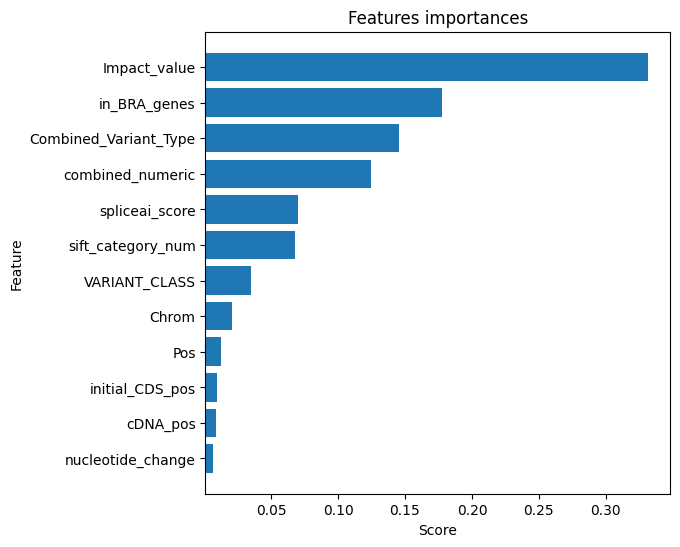

                  feature     score
0            Impact_value  0.330623
1            in_BRA_genes  0.176818
2   Combined_Variant_Type  0.144457
3        combined_numeric  0.123520
4          spliceai_score  0.069020
..                    ...       ...
7                   Chrom  0.019943
8                     Pos  0.011888
9         initial_CDS_pos  0.008465
10               cDNA_pos  0.008197
11      nucleotide_change  0.005949

[12 rows x 2 columns]


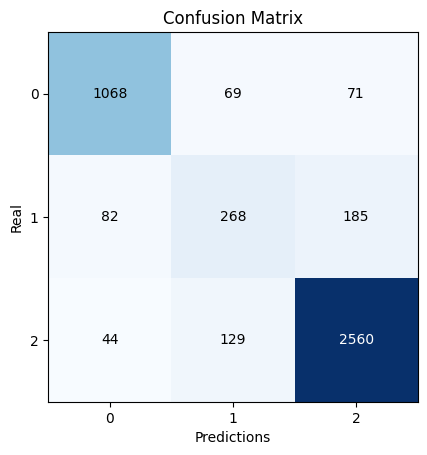

In [87]:
classifier(ann_df , "model_class") #87,04

We observe a notable enhancement in model accuracy, reaching 87,04% compared to the 69.24% of the initial model or the 79,54% obtained before feature engineering steps. In addition, we have been able to increase the prediction accuracy reducing the total amount of variables taked into account by the model to only 10. As anticipated when we investigate the different columns, uncertain significance variants lack distinct features or columns that unambiguously identify them as uncertain significate pathogenic. In addition, they are the most underrepresented biasing the model to classify them as benign or pathologic variants. However, we have been able to slightly increase the precision of correctly identifying uncertain significate variants from 41,3% to  46,35%.

Conversely, as demostrated in prior steps, pathogenic and benign variants tend to exhibit discernible patterns in certain columns, facilitating their accurate differenciation.




CONCLUSION

Interpreting variants is a difficult task that needs a lot of expertise in the field in order to be done correctly. For this reason HCMG has provided guidelines that help clasify properly variants with different pathogenic categories. This guidelines are based on historical information about these variants (articles that have been published indicating the function and consequences of these variants) which is a time consuming step.

We have developed a machine learning model, using confident reviews from ClinVar and classifying these variations into 3 pathogenic classifications:
-pathogenic
- Uncertain significance
- Benign

This model uses information from each annotation obtained from VEP software to be able to classify each variant into one of these categories with a 86,13% of accuracy.

However, we have to take into account some limitations of the model:
- By exclusively considering variants with high confidence reports, we have prioritized variants that are in protein-coding genes, as have been observed through BIOTYPE column. Consequently these variants tends to have a higher probability to have a direct effect (either benign or pathogenic). However, in reality the proportion of variants that are encoded in protein-coding genes accounts only for the 1-2% of the total variants. This vast amount of variants, often considered junk DNA reside outside coding regions and its impact is negligible. For this reason this model has not been trained over variants that not belong to protein coding and can't be used to predict the pathogenicity of non protein-coding variants.